<a href="https://colab.research.google.com/github/navss23/customersegmentation/blob/main/customersegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 Customer Segmentation using Credit Card Data

## Objective
To segment credit card customers based on financial behavior in order to recommend personalized services like custom credit limits, offers, and payment strategies.

## Dataset
Dataset: `CC GENERAL.csv`  
Source: Kaggle (Arjun Bhasin, 2013)  
Rows: 8950, Columns: 18  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import linkage, dendrogram


In [ ]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('CC GENERAL.csv')
df.head()


Saving CC GENERAL.csv to CC GENERAL.csv


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [ ]:
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median())
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median())


In [ ]:
df['BALANCE_LIMIT_RATIO'] = df['BALANCE'] / (df['CREDIT_LIMIT'] + 1)
df['PURCHASES_RATIO'] = df['PURCHASES'] / (df['CREDIT_LIMIT'] + 1)
df['PAYMENT_RATIO'] = df['PAYMENTS'] / (df['CREDIT_LIMIT'] + 1)


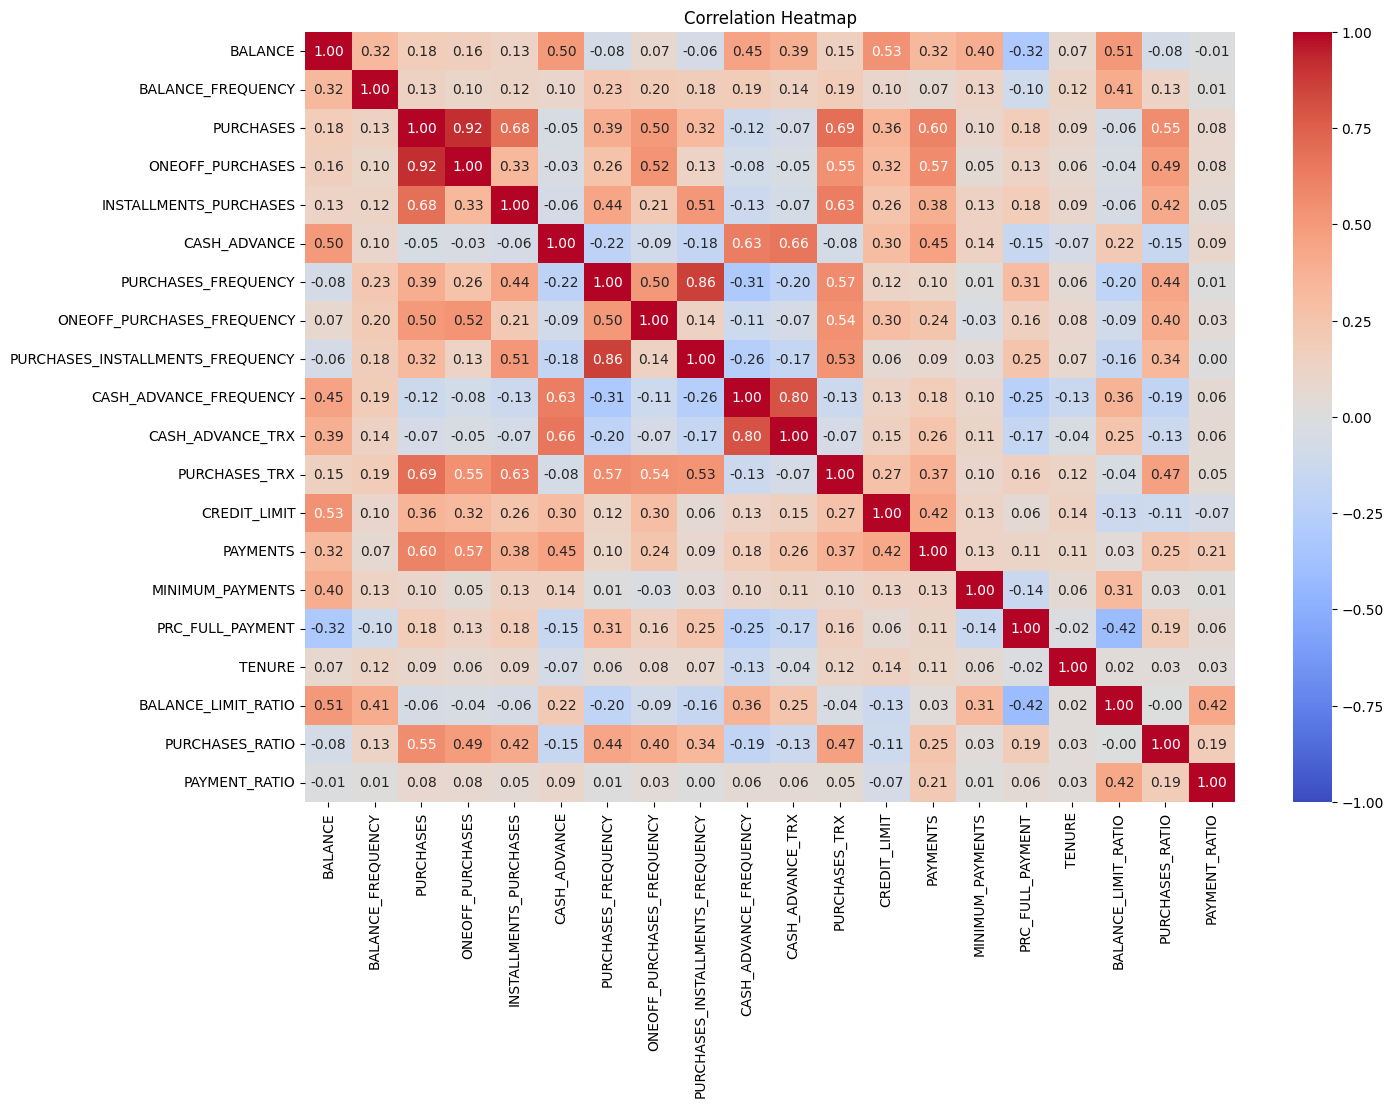

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.drop('CUST_ID', axis=1).corr(), cmap='coolwarm', annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
df_model = df.drop(['CUST_ID'], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_model)


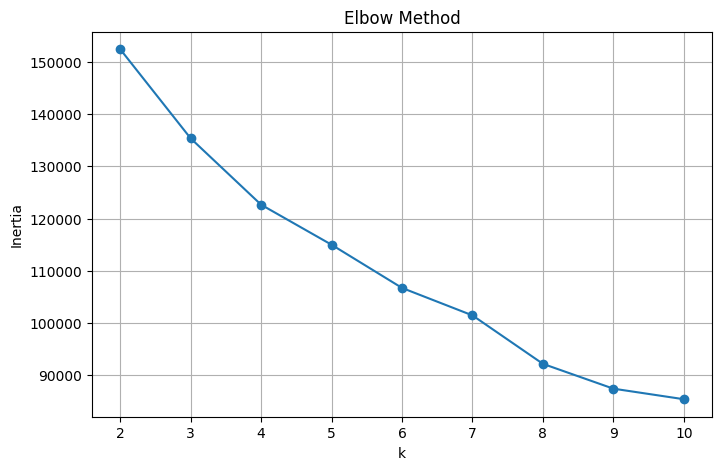

In [ ]:
inertia = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

df_model['KMeans_Cluster'] = cluster_labels

score = silhouette_score(X_scaled, cluster_labels)
print(f"Silhouette Score (KMeans k=4): {score:.3f}")


Silhouette Score (KMeans k=4): 0.176


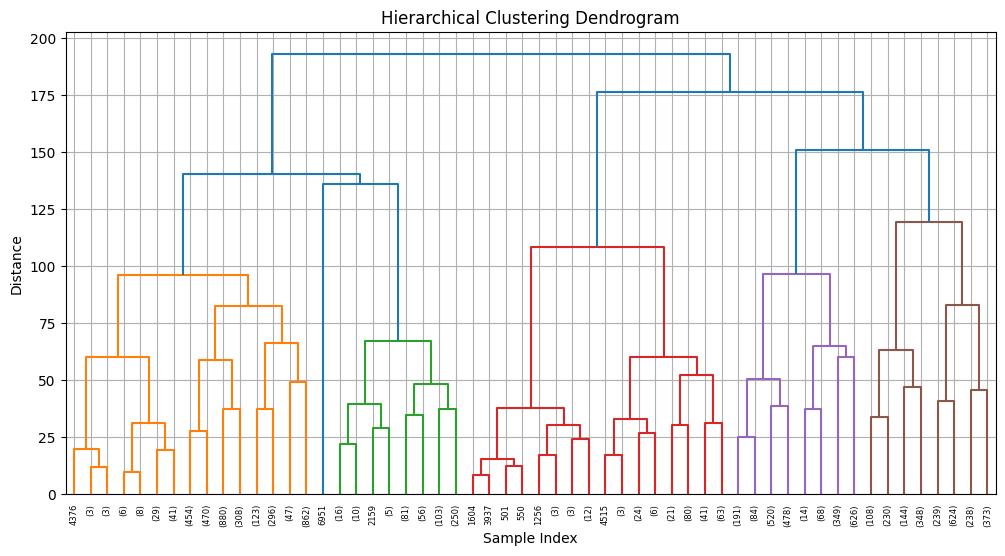

In [ ]:
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.grid(True)
plt.show()


In [ ]:
agglo = AgglomerativeClustering(n_clusters=4)
agglo_labels = agglo.fit_predict(X_scaled)

df_model['Agglo_Cluster'] = agglo_labels

score_agglo = silhouette_score(X_scaled, agglo_labels)
print(f"Agglomerative Clustering Silhouette Score: {score_agglo:.3f}")


Agglomerative Clustering Silhouette Score: 0.144


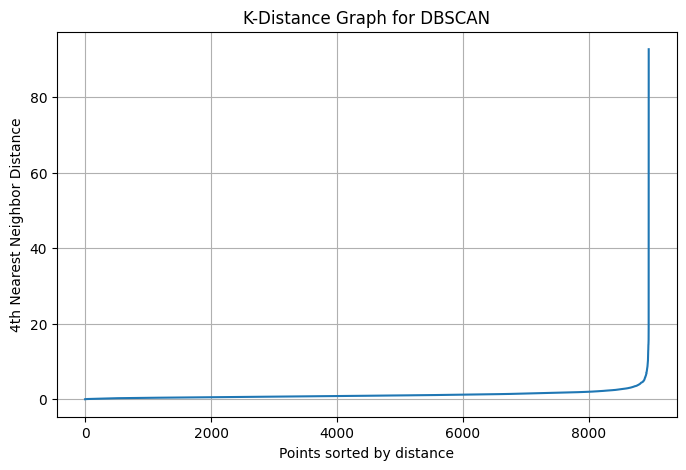

In [ ]:
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(X_scaled)
distances, _ = neighbors_fit.kneighbors(X_scaled)

distances = np.sort(distances[:, 3])  # 4th NN
plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.title("K-Distance Graph for DBSCAN")
plt.xlabel("Points sorted by distance")
plt.ylabel("4th Nearest Neighbor Distance")
plt.grid(True)
plt.show()


In [ ]:
dbscan = DBSCAN(eps=2.2, min_samples=4)  # Adjust eps based on graph
dbscan_labels = dbscan.fit_predict(X_scaled)

df_model['DBSCAN_Cluster'] = dbscan_labels

score_db = silhouette_score(X_scaled, dbscan_labels)
print(f"DBSCAN Silhouette Score: {score_db:.3f}")


DBSCAN Silhouette Score: 0.300


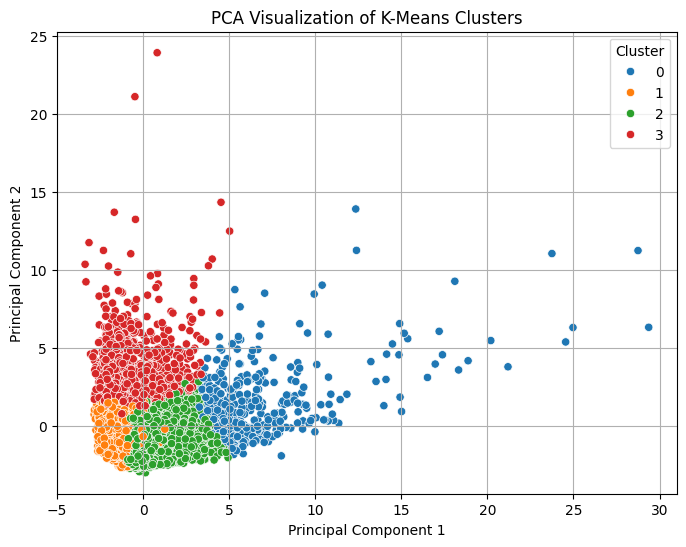

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df_model['KMeans_Cluster'], palette='tab10')
plt.title("PCA Visualization of K-Means Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [ ]:
# Inverse transform to get original scale
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

# Create DataFrame with original feature names
feature_columns = df_model.drop(columns=['KMeans_Cluster', 'Agglo_Cluster', 'DBSCAN_Cluster']).columns
centers_df = pd.DataFrame(cluster_centers, columns=feature_columns)
centers_df['Cluster'] = range(4)
centers_df.set_index('Cluster', inplace=True)

# Display transposed for better readability
centers_df.T


Cluster,0,1,2,3
BALANCE,3455.703555,987.487282,859.763729,4543.212881
BALANCE_FREQUENCY,0.986159,0.786844,0.932381,0.971031
PURCHASES,7694.701192,252.599369,1251.358174,481.943626
ONEOFF_PURCHASES,5105.223869,193.957386,611.491001,303.904689
INSTALLMENTS_PURCHASES,2590.937178,58.922815,640.132758,178.117873
CASH_ADVANCE,692.974150,580.307008,199.617233,4309.348702
PURCHASES_FREQUENCY,0.945056,0.169846,0.882044,0.287254
ONEOFF_PURCHASES_FREQUENCY,0.725905,0.082496,0.302865,0.134524
PURCHASES_INSTALLMENTS_FREQUENCY,0.785442,0.083844,0.704674,0.186328
CASH_ADVANCE_FREQUENCY,0.071754,0.111107,0.042099,0.471143


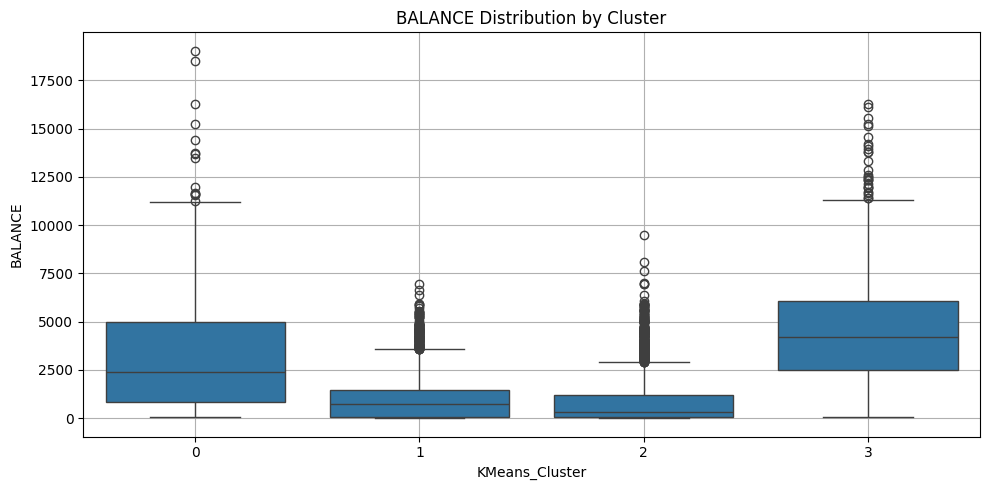

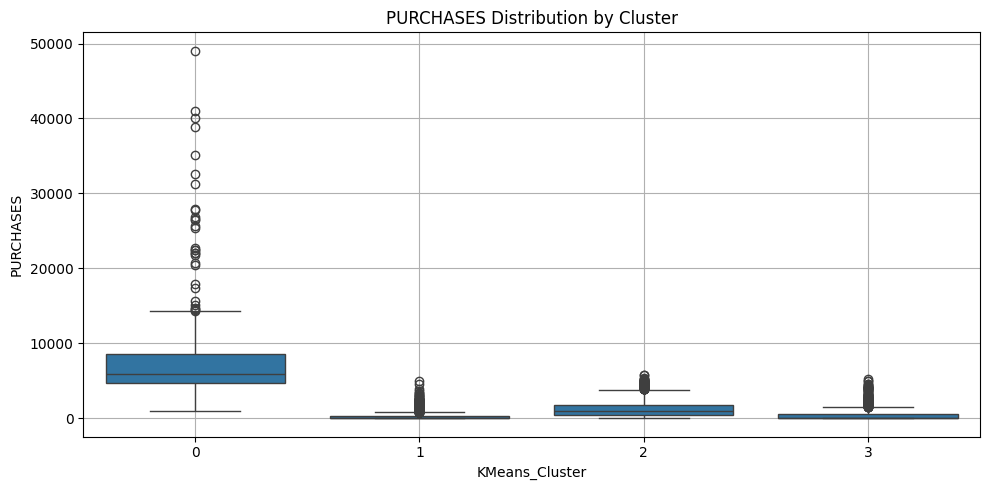

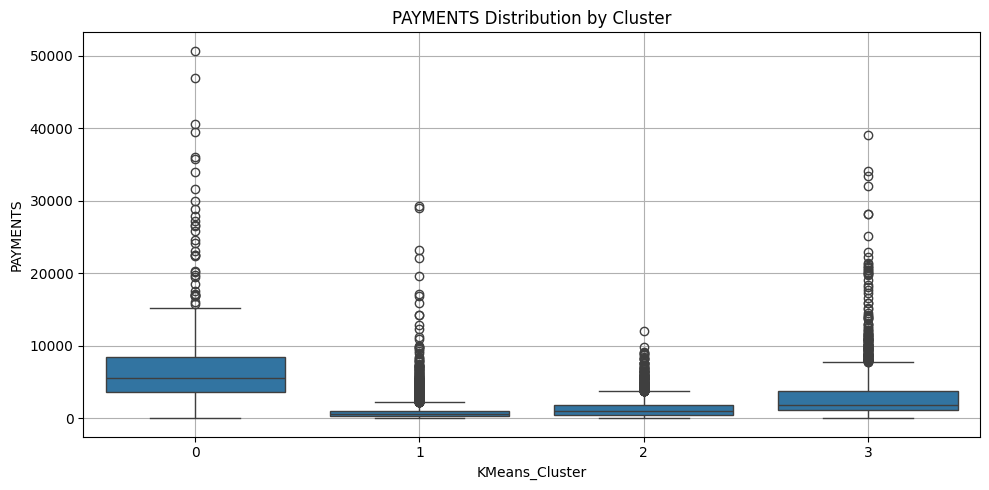

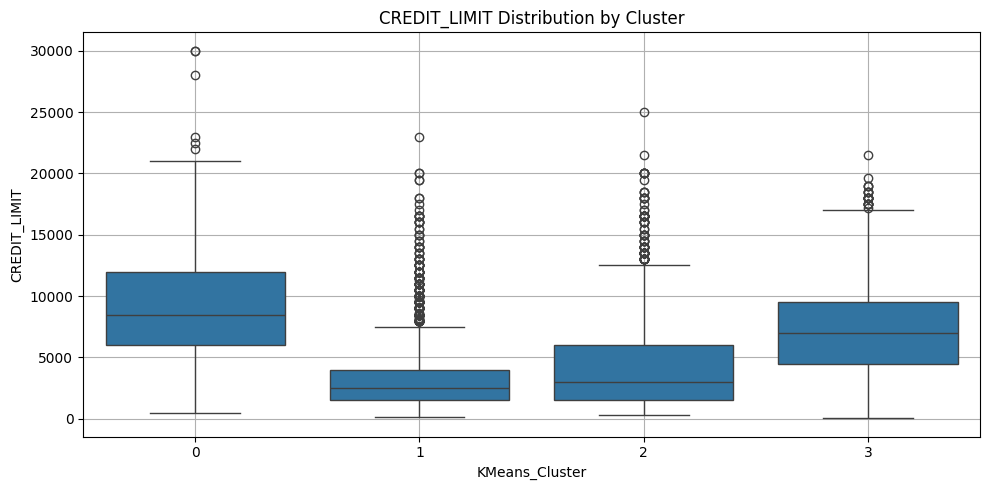

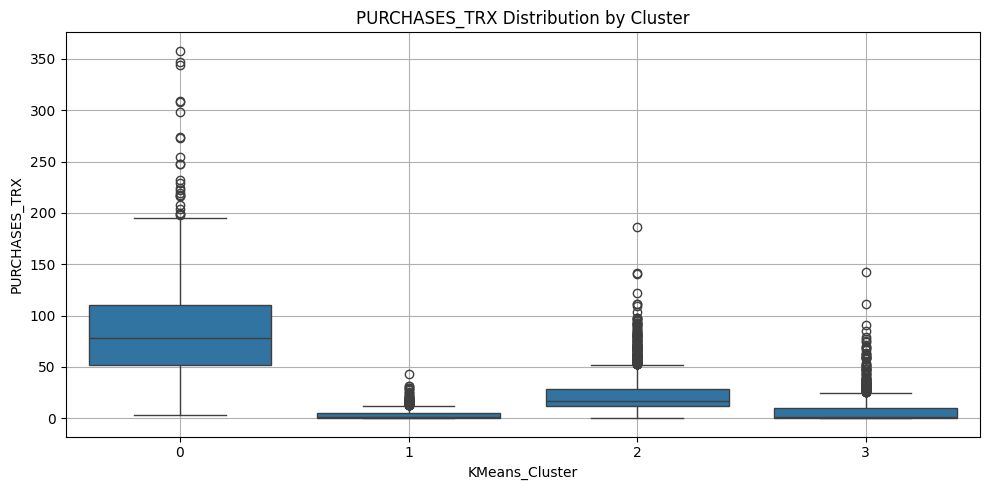

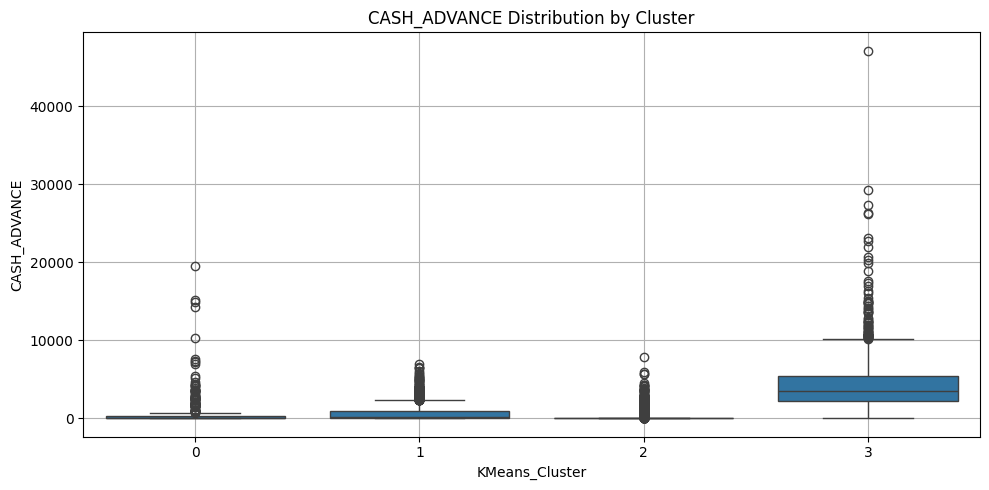

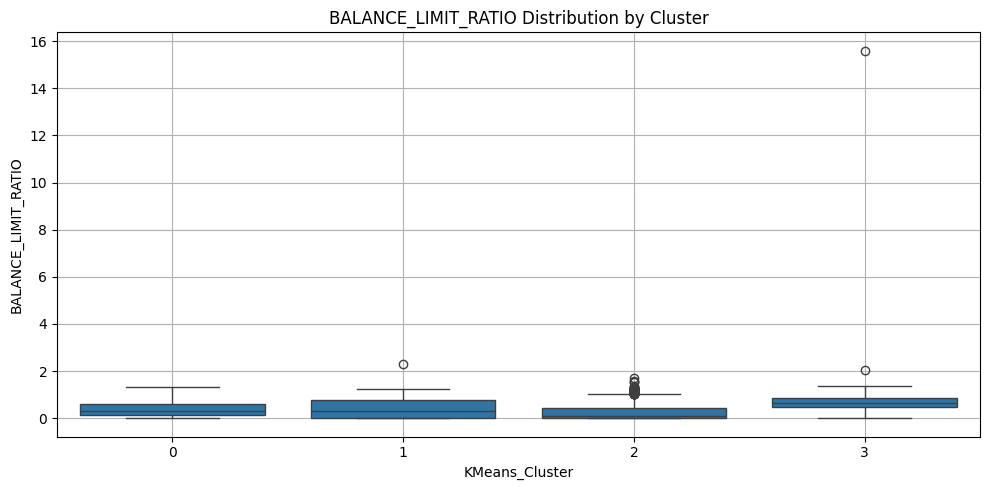

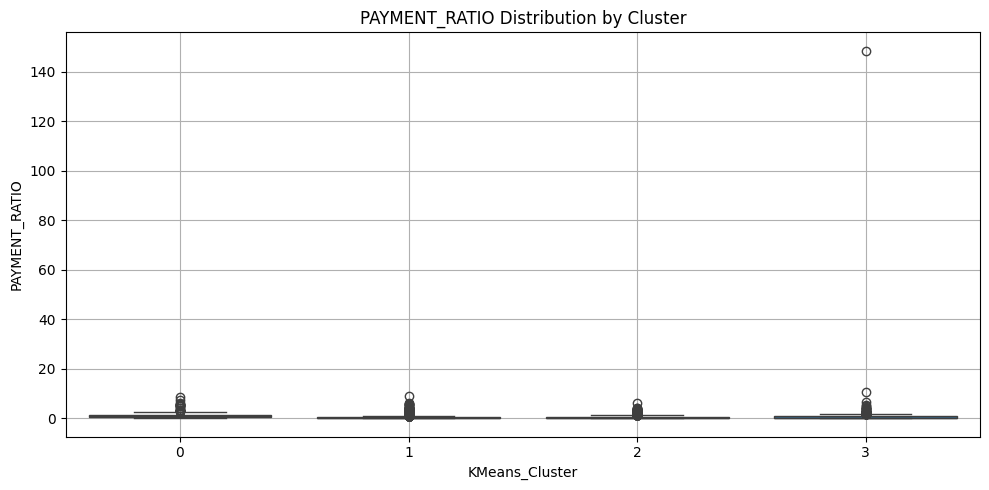

In [ ]:
# Assign clustered labels back to the dataframe for analysis
df_clustered = df_model.copy()

# List of important features to explore per cluster
important_features = ['BALANCE', 'PURCHASES', 'PAYMENTS', 'CREDIT_LIMIT',
                      'PURCHASES_TRX', 'CASH_ADVANCE', 'BALANCE_LIMIT_RATIO', 'PAYMENT_RATIO']

# Generate boxplots for each selected feature across clusters
for feature in important_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='KMeans_Cluster', y=feature, data=df_clustered)
    plt.title(f'{feature} Distribution by Cluster')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


### Cluster Profiling and Interpretation

After applying K-Means clustering, we analyzed the cluster centroids to understand the underlying customer behavior. Based on both the numeric summaries and visual boxplots, the clusters can be interpreted as follows:

#### 🔹 Cluster 0: High-Value Engaged Customers
- High balance, purchases, and credit limit
- High purchase frequency and transaction count
- Likely to pay full payments regularly
- **Business Action**: Target for premium services, reward programs, or cross-sell offers.

#### 🔹 Cluster 1: Inactive or Dormant Users
- Low balance, purchases, and transactions
- Low repayment amounts and frequency
- **Business Action**: Design re-engagement campaigns or minimal-risk credit plans.

#### 🔹 Cluster 2: Moderate Users
- Moderate purchase and balance values
- More use of installment purchases than one-off
- Average payments and credit usage
- **Business Action**: Upsell credit products or offer small incentives to increase usage.

#### 🔹 Cluster 3: Credit-Dependent or Risky Users
- Low purchase activity but high balance and cash advance usage
- Low full payment ratio and high credit utilization
- **Business Action**: Monitor for risk, consider reducing credit exposure, or offer financial advisory services.

These personas help in creating targeted marketing strategies, enhancing credit risk management, and improving customer satisfaction through personalization.



###  Final Conclusion

In this project, we performed a comprehensive customer segmentation analysis on credit card users using unsupervised learning techniques. After data preprocessing, scaling, and feature engineering, we applied K-Means, Agglomerative Clustering, and DBSCAN to discover customer groups. K-Means provided the most interpretable and balanced clusters, validated through silhouette scores and PCA visualization.

Through cluster profiling and exploratory analysis, we identified distinct customer personas, enabling actionable business recommendations. This project demonstrates how data-driven segmentation can support personalized marketing, risk management, and customer engagement strategies in the financial domain.
